In [1]:
using Revise

In [6]:
using ITensors
using Plots
import CTMRG

In [3]:
ITensors.disable_warn_order()

14

$$自発磁化をL=1,2,3の角転送行列を使わなくても計算できる範囲でまず計算する。

In [ ]:
#自発磁化
Llist = [1, 2, 3]
β = 1.0
J = 1.0
sp_magnet_list = []
for L in Llist
    sp_magnet = CTMRG.calc_spontaneous_magnetization(L, β, J, "i=$(L+1),j=$L,s")
    push!(sp_magnet_list, sp_magnet)
end

$$ スピン相関関数をL=3で角転送行列を使わなくても計算できる範囲でまず計算する。

In [33]:
#スピン相関関数
L = 3
l = 20
@show Tlist = range(1.0, 4.0, length=l)
@show βlist = 1.0 ./ Tlist 
#β = 1.0
J = 1.0
spin_corr_list = []
for β in βlist
    spin_corr = CTMRG.calc_spin_correlation(L, β, J, "i=$(L+1),j=$L,s", "i=$(L+1),j=$(L+1),s")
    push!(spin_corr_list, spin_corr)
end
spin_corr_list
;

Tlist = range(1.0, 4.0, length = l) = 1.0:0.15789473684210525:4.0
βlist = 1.0 ./ Tlist = [1.0, 0.8636363636363636, 0.7599999999999999, 0.6785714285714286, 0.6129032258064516, 0.5588235294117647, 0.5135135135135135, 0.47500000000000003, 0.4418604651162791, 0.41304347826086957, 0.3877551020408163, 0.36538461538461536, 0.34545454545454546, 0.3275862068965517, 0.31147540983606553, 0.296875, 0.2835820895522388, 0.2714285714285714, 0.2602739726027397, 0.25]


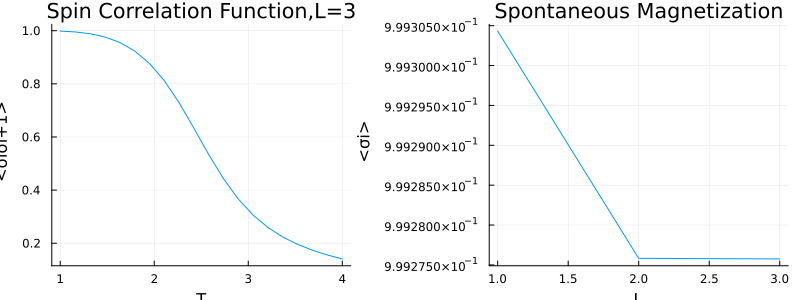

In [38]:
p1 = plot(Tlist, spin_corr_list, xlabel="T", ylabel=" <σiσi+1>", title="Spin Correlation Function,L=$L", legend=false)
p2 = plot(Llist, sp_magnet_list,xlabel="L", ylabel=" <σi>", title="Spontaneous Magnetization", legend=false)
plot(p1, p2, layout=(1, 2), size=(800, 300))

$$角転送行列繰り込み群